$\sigma_i^2=\left\langle(v_i-\langle v_i\rangle)^2\right\rangle=\left\langle v_i^2-\langle v_i\rangle^2\right\rangle$
2ter Term entspricht np.std()^2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
# Daten einlesen
r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
# 'C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat'

In [3]:
#ueberpruefe, ob Daten anhand der Entfernung sortiert sind, Ergebnis=0 bedeutet ja
r_sort=np.sort(r_3d)
rest=r_3d-r_sort
print(np.sum(rest))

0.0


In [6]:
#Definitionen von allem

stars=len(r_3d)
bin_num=50
spb=stars/bin_num

#fuer velocity dispersion
sigrad_r3d=np.zeros(bin_num)
sigtan_r3d=np.zeros(bin_num)
sigrad_r3d_neu=np.zeros(bin_num)
sigtheta_r3d=np.zeros(bin_num)
sigphi_r3d=np.zeros(bin_num)

#fuer Fehlerbalken
sigraderr=np.zeros(bin_num)
sigthetaerr=np.zeros(bin_num)
sigphierr=np.zeros(bin_num)

#fuer mean velocities
meantan_r3d=np.zeros(bin_num)
meanrad_r3d=np.zeros(bin_num)
meanrad_r3d_neu=np.zeros(bin_num)
meantheta_r3d=np.zeros(bin_num)
meanphi_r3d=np.zeros(bin_num)

beta=np.zeros(bin_num)

R=np.zeros(bin_num)
Rerr=np.zeros(bin_num)

In [7]:
#berechne Standardabweichung der rad. vel. in Bins mit immer gleichen Anzahl an Sternen und die durchschnittliche Entfernung
for n in range(bin_num):
    R[n]=np.mean(r_3d[n*spb+1:(n+1)*spb+1]) #berechnet mittlere Entfernung der Sterne in einem bin
    Rerr[n]=stats.sem(R[n],ddof=0)
    sigrad_r3d[n]=np.std(v_r[n*spb+1:(n+1)*spb+1]) #vel. disp Wert der ursprunglichen radial velocity
    sigtan_r3d[n]=np.std(v_t[n*spb+1:(n+1)*spb+1]) #vel disp Wert der urspruenglichen tangential velocity
    sigrad_r3d_neu[n]=np.std(vr[n*spb+1:(n+1)*spb+1]) #vel disp Wert der neuen radial velocity
    sigtheta_r3d[n]=np.std(vtheta[n*spb+1:(n+1)*spb+1]) #vel disp Wert der theta velocity
    sigphi_r3d[n]=np.std(vphi[n*spb+1:(n+1)*spb+1]) #vel disp Wert der phi velocity
    sigraderr[n]=sigrad_r3d_neu[n]/np.sqrt(2*spb) #Fehler der radialen Standardabweichung
    sigthetaerr[n]=sigtheta_r3d[n]/np.sqrt(2*spb) #Fehler der azimuthalen Standardabweichung
    sigphierr[n]=sigphi_r3d[n]/np.sqrt(2*spb) #Fehler der polaren Standardabweichung
    meantan_r3d[n]=np.mean(v_t[n*spb+1:(n+1)*spb+1]) #mean wert der urspruenglichen radial velocity
    meanrad_r3d[n]=np.mean(v_r[n*spb+1:(n+1)*spb+1]) #mean wert der urspruenglichen tangential velocity
    meanrad_r3d_neu[n]=np.mean(vr[n*spb+1:(n+1)*spb+1]) #mean Wert der neuen radial velocity
    meantheta_r3d[n]=np.mean(vtheta[n*spb+1:(n+1)*spb+1]) #mean Wert der theta velocity
    meanphi_r3d[n]=np.mean(vphi[n*spb+1:(n+1)*spb+1]) #mean Wert der phi velocity
    beta[n]=1-(sigtheta_r3d[n]**2+sigphi_r3d[n]**2)/(2*sigrad_r3d_neu[n]**2) #anisotropy parameter beta
    #print(len(r_3d[n*spb+1:(n+1)*spb+1]),R[n])

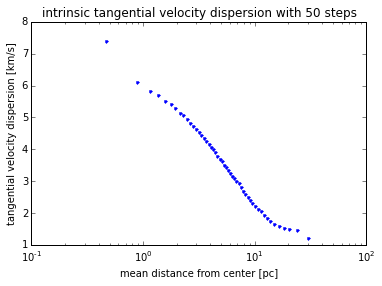

In [8]:
#Plot 3D tangential velocity dispersion
plt.semilogx(R,sigtan_r3d,'.')
plt.xlabel('mean distance from center [pc]')
plt.ylabel('tangential velocity dispersion [km/s]')
plt.title('intrinsic tangential velocity dispersion with '+str(bin_num)+' steps')
plt.savefig('Plots/3d tangential velocity dispersion with '+str(bin_num)+' steps')

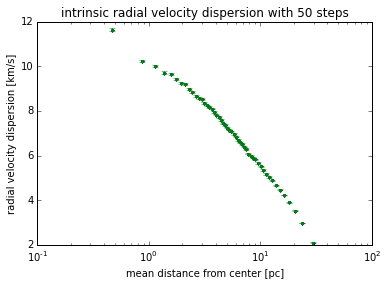

In [9]:
# Plot 3D radial velocity dispersion
plt.semilogx(R,sigrad_r3d,'.')
plt.errorbar(R,sigrad_r3d,sigraderr, fmt='.')
plt.xlabel('mean distance from center [pc]')
plt.ylabel('radial velocity dispersion [km/s]')
plt.title('intrinsic radial velocity dispersion with '+str(bin_num)+' steps')
plt.savefig('Plots/3d radial velocity dispersion with '+str(bin_num)+' steps')

In [10]:
# Plot 2D velocity dispersion
#plt.semilogx(R,sig_r2d,'.')
#plt.xlabel('distance from center [pc]')
#plt.ylabel('radial velocity dispersion [km/s]')
#plt.title('projected radial velocity dispersion'
#plt.savefig('Plots/2d radial velocity dispersion')

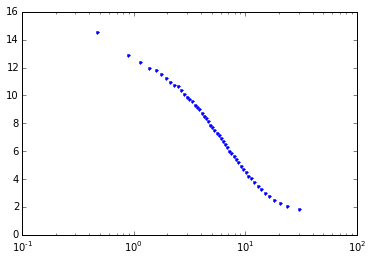

In [11]:
plt.semilogx(R,meantan_r3d,'.')
#sollte um 0 sein, ist es nicht.

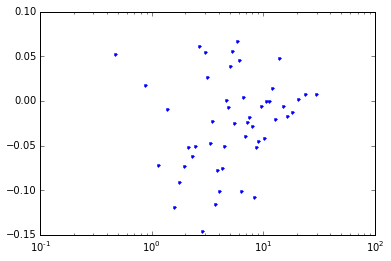

In [12]:
plt.semilogx(R,meanrad_r3d,'.')
#sollte um 0 sein, ist es.

bisschen Theorie
--
Die Kurve der tangential velocity dispersion sollte etwa zweimal so hoch sein wie die der radialen. Die tangentialgechwindigkeit wird ueber die winkelgeschwindigkeiten berechnet $\left(v_t=\sqrt{v_\theta^2+v_\phi^2}\right)$. Bei isotropen Galaxien und Kugelsternhaufen und sowas sollte gelten: $\sigma_r^2=\sigma_\theta^2=\sigma_\phi^2$.=, wodurch die tangential velocity dispersion doppelt so gross sein sollte wie die radiale. die mean motion der einzelnen Geschwindigkeiten sollte 0 ergeben, sonst waere das Objekt instabil, wenn $<v_r>\neq0$ bzw haette turbulenzen wenn $<v_t>\neq0$. hier ist das fuer mean tangential velocity nicht gegeben. dies liegt daran, dass vorher ueber theta und phi geschwindigkeit addiert wurde. also erstmal jede Komponente einzeln berechnen!

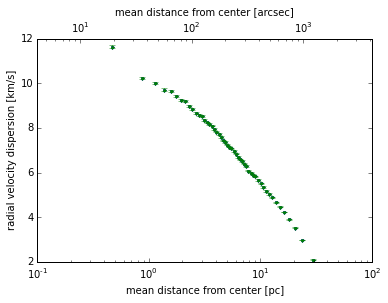

In [20]:
#plt.title('intrinsic radial velocity dispersion with '+str(bin_num)+' steps')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.semilogx(R,sigrad_r3d_neu,'.')
ax1.errorbar(R,sigrad_r3d_neu,sigraderr,fmt='.')
ax1.set_xlim(0.1,100)
ax1.set_xlabel('mean distance from center [pc]')
ax1.set_ylabel('radial velocity dispersion [km/s]')

ax2.set_xlim((0.1/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi))
ax2.set_xscale('log')
ax2.set_xlabel('mean distance from center [arcsec]')

plt.show()
#fig.savefig('Plots/3d new radial velocity dispersion with '+str(bin_num)+' steps')

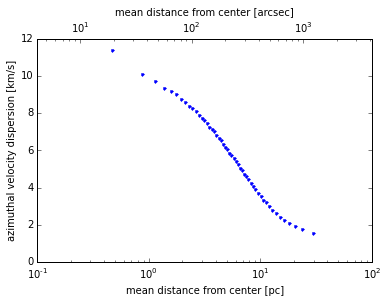

In [14]:
#plt.title('intrinsic azimuthal velocity dispersion with '+str(bin_num)+' steps')


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.semilogx(R,sigtheta_r3d,'.')
#ax1.errorbar(R,sigtheta_r3d,sigthetaerr,fmt='.')
ax1.set_xlim(0.1,100)
ax1.set_xlabel('mean distance from center [pc]')
ax1.set_ylabel('azimuthal velocity dispersion [km/s]')

ax2.set_xlim((0.1/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi))
ax2.set_xscale('log')
ax2.set_xlabel('mean distance from center [arcsec]')

plt.show()
fig.savefig('Plots/3d azimuthal velocity dispersion with '+str(bin_num)+' steps')

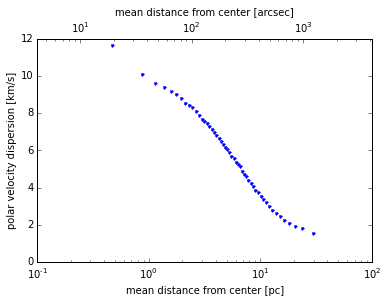

In [15]:
#plt.title('intrinsic polar velocity dispersion with '+str(bin_num)+' steps')


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.semilogx(R,sigphi_r3d,'.')
#ax1.errorbar(R,sigphi_r3d,sigphierr,fmt='.')
ax1.set_xlim(0.1,100)
ax1.set_xlabel('mean distance from center [pc]')
ax1.set_ylabel('polar velocity dispersion [km/s]')

ax2.set_xlim((0.1/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi))
ax2.set_xscale('log')
ax2.set_xlabel('mean distance from center [arcsec]')

plt.show()
fig.savefig('Plots/3d polar velocity dispersion with '+str(bin_num)+' steps')

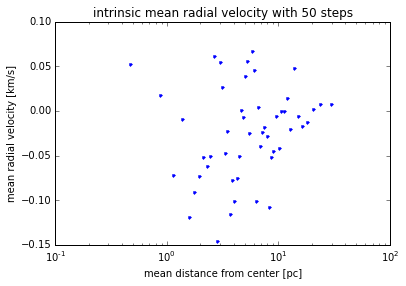

In [16]:
plt.semilogx(R,meanrad_r3d_neu,'.')
plt.xlabel('mean distance from center [pc]')
plt.ylabel('mean radial velocity [km/s]')
plt.title('intrinsic mean radial velocity with '+str(bin_num)+' steps')
plt.savefig('Plots/3d mean radial velocity with '+str(bin_num)+' steps')

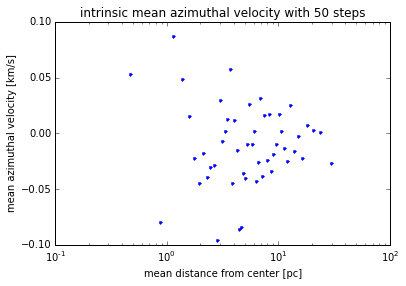

In [17]:
plt.semilogx(R,meantheta_r3d,'.')
plt.xlabel('mean distance from center [pc]')
plt.ylabel('mean azimuthal velocity [km/s]')
plt.title('intrinsic mean azimuthal velocity with '+str(bin_num)+' steps')
plt.savefig('Plots/3d mean azimuthal velocity with '+str(bin_num)+' steps')

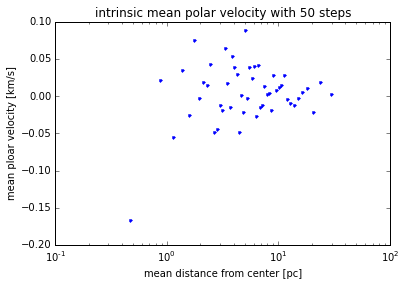

In [18]:
plt.semilogx(R,meanphi_r3d,'.')
plt.xlabel('mean distance from center [pc]')
plt.ylabel('mean ploar velocity [km/s]')
plt.title('intrinsic mean polar velocity with '+str(bin_num)+' steps')
plt.savefig('Plots/3d mean polar velocity with '+str(bin_num)+' steps')

Anisotropy parameter beta 
---
$$\beta\equiv1-\frac{\sigma_\theta^2+\sigma_\phi^2}{2\sigma_r^2}$$

Quelle: Binney&Tremaine 2008 eq. (4.61)

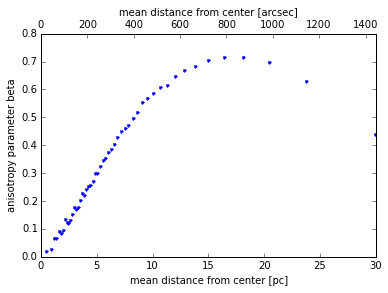

In [19]:
#anisotropy parameter beta

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(R,beta,'.')
#ax1.set_xlim(0.1,100)
ax1.set_xlabel('mean distance from center [pc]')
ax1.set_ylabel('anisotropy parameter beta')

ax2.set_xlim((0./5000)*360*3600/(2*np.pi),(35./5000)*360*3600/(2*np.pi))
#ax2.set_xscale('log')
ax2.set_xlabel('mean distance from center [arcsec]')

fig.savefig('Plots/anisotropy parameter beta')